# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [ ]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import panel as pn
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv

# Initialize the Panel Extensions (for Plotly)
pn.extension('plotly')

In [60]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")
px.set_mapbox_access_token(mapbox_token)

# Import Data

In [ ]:
# Import the CSVs to Pandas DataFrames
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")

file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [ ]:
# Define Panel Visualization Functions

In [84]:
# Housing Units Per Year Plot

housing_units_to_plot = sfo_data.groupby('year').mean()
housing_units_to_plot.drop(['sale_price_sqr_foot','gross_rent'], axis=1, inplace=True)

min_housing = sfo_data['housing_units'].min()
max_housing = sfo_data['housing_units'].max()
std_housing = sfo_data['housing_units'].std()
std_housing = sfo_data['housing_units'].std()
min_housing_corrected = min_housing - std_housing
max_housing_corrected = max_housing + std_housing

def housing_units_per_year():
    """Housing Units Per Year."""
    chart_title = "Housing Units in San Francisco from 2010 to 2016"
    plt = housing_units_to_plot.plot(kind='bar',title='Housing Units in San Francisco from 2010 to 2016', ylim=(min_housing_corrected, max_housing_corrected), figsize=(10,6))
    plt.set_ylabel("Housing Units")
    plt.set_xlabel('Year')
    return plt

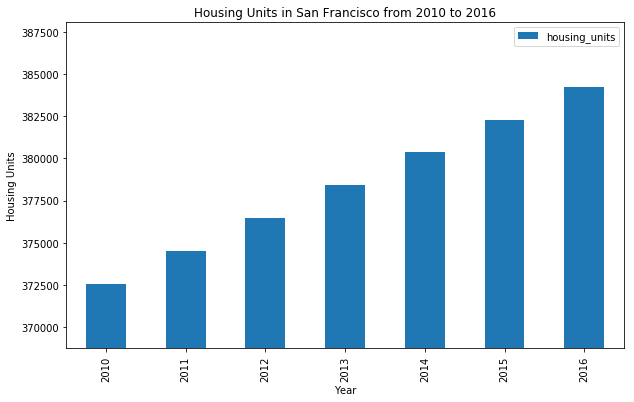

In [83]:
housing_units_per_year()

In [ ]:
# Average Gross Rent Plot

avg_gross_rent = sfo_data.groupby('year').mean()
avg_gross_rent.drop(['sale_price_sqr_foot','housing_units'], axis=1, inplace=True)

def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    rent_plot = avg_gross_rent.plot(title="Average Gross Rent in San Francisco", figsize=(10,6))
#     rent_plot.set_ylabel("Gross Rent")
    rent_plot.set_xlabel('Year')    
    return rent_plot  

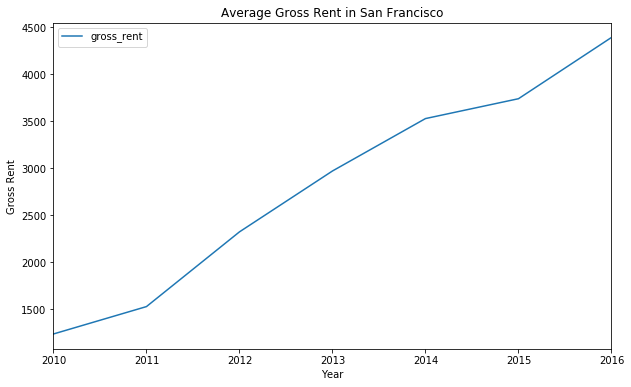

In [52]:
average_gross_rent()

In [ ]:
# Average Sales Price Plot

avg_sale_price = sfo_data.groupby('year').mean()
avg_sale_price.drop(['gross_rent','housing_units'], axis=1, inplace=True)

def average_sales_price():
    """Average Sales Price Per Year."""
    sale_plot = avg_sale_price.plot(title="Average Sale Price per Square Foot in San Francisco", figsize=(10,6))
    sale_plot.set_ylabel("Avg Sale Price")
    sale_plot.set_xlabel('Year')
    return sale_plot

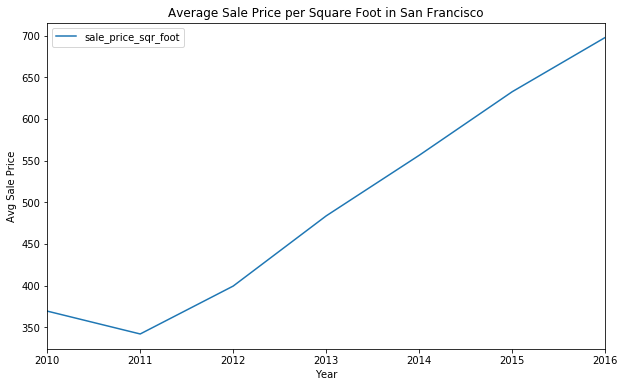

In [53]:
average_sales_price()

In [ ]:
# Average Price by Neighborhood Plot

avg_price_neighborhood = sfo_data.groupby(['year', 'neighborhood']).mean()
avg_price_neighborhood.drop(['housing_units', 'gross_rent'], axis=1, inplace=True)
avg_price_neighborhood_df = avg_price_neighborhood.reset_index()
avg_price_neighborhood_df.head()


def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    avg_prices_hood = avg_price_neighborhood_df.hvplot('year', groupby='neighborhood', width=700, dynamic=False, ylabel='Avg. Sale Price per Sqft')
    return avg_prices_hood

In [54]:
average_price_by_neighborhood()

:HoloMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [ ]:
# Top 10 Most Expensive Neighborhoods Plot

avg_expensive = sfo_data.groupby(by=['neighborhood']).mean()
avg_expensive = avg_expensive.sort_values('sale_price_sqr_foot', ascending=False)
avg_top_10_expensive = avg_expensive.head(10)  

def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""
    
    top_10_plot = avg_top_10_expensive.hvplot.bar(
        x='neighborhood',
        y='sale_price_sqr_foot',
        label='Top 10 Most Expensive Neighborhoods in San Francisco',
        height=500,
        rot=60)
    return top_10_plot 


In [55]:
top_most_expensive_neighborhoods()

:Bars   [neighborhood]   (sale_price_sqr_foot)

In [ ]:
# Parallel Coordinates Plot 

def parallel_coordinates():
    """Parallel Coordinates Plot."""
    parallel_coor_plot= px.parallel_coordinates(avg_top_10_expensive, color='sale_price_sqr_foot')
    return parallel_coor_plot
    

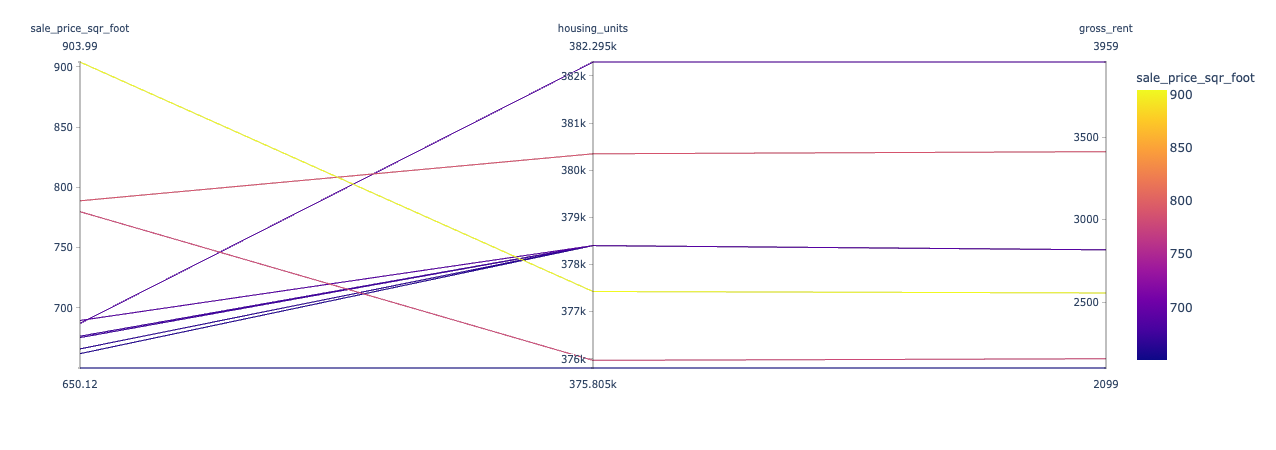

In [71]:
parallel_coordinates()

In [ ]:
# Parallel Categories Plot

avg_top_10_expensive_df = avg_top_10_expensive.reset_index()

def parallel_categories():
    """Parallel Categories Plot."""
    parallel_cat_plot = px.parallel_categories(
    avg_top_10_expensive_df,
    dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"],
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,)
    return parallel_cat_plot


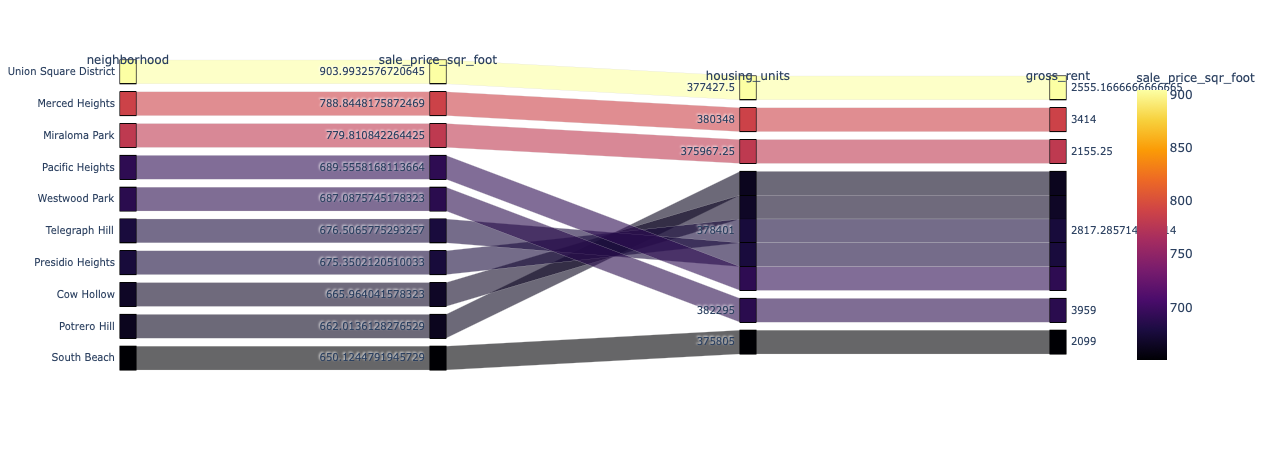

In [57]:
parallel_categories()

In [61]:
# Mapbox Plot

avg_expensive_df = sfo_data.groupby(by=['neighborhood']).mean()
avg_expensive_df = avg_expensive_df.reset_index()
avg_expensive_locations = pd.concat([avg_expensive_df, df_neighborhood_locations], axis="columns", join="inner")

def neighborhood_map():
    """Neighborhood Map"""
    mapbox_plot = px.scatter_mapbox(
    avg_expensive_locations,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    title="Average Sale Price per Square Foot and Gross Rent in San Francisco",
    color_continuous_scale=px.colors.cyclical.IceFire,
    zoom = 11,
    width=1000)
    return mapbox_plot

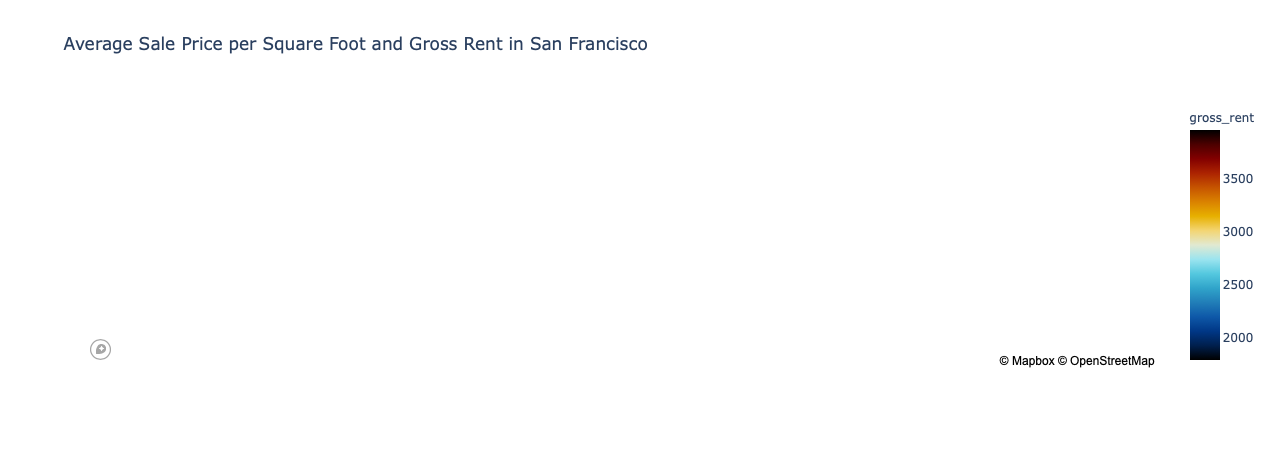

In [62]:
neighborhood_map()

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

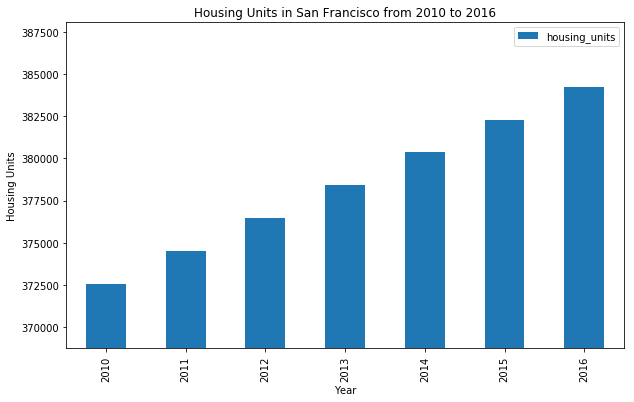

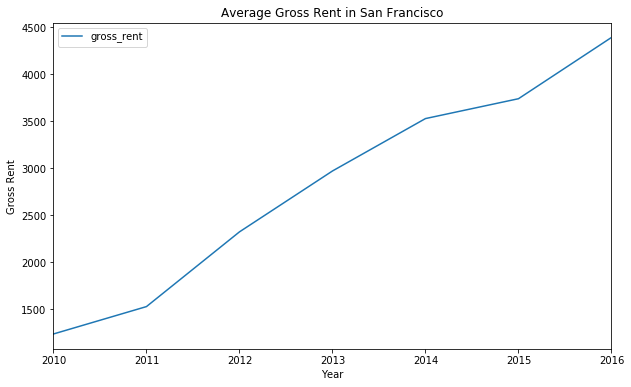

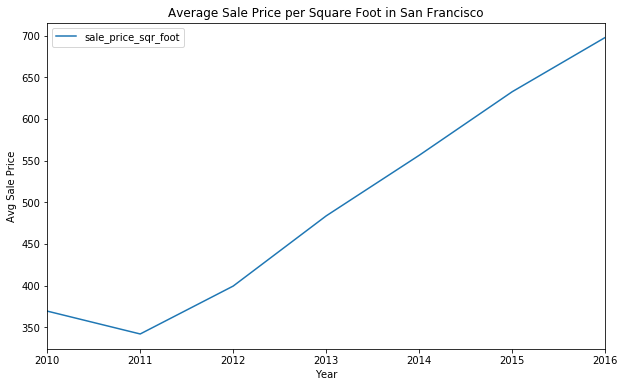

In [65]:
# YOUR CODE HERE! 

introduction_column = pn.Column(
   neighborhood_map())

neighborhood_column = pn.Column(
    "## Average Prices by Neighborhood in San Francsico",
    average_price_by_neighborhood(),
    top_most_expensive_neighborhoods()
)

parallel_column = pn.Column(
     "## Parallel Plots Analysis",
     parallel_coordinates(),
     parallel_categories()
)

yearly_row = pn.Row(
     housing_units_per_year(), 
     average_gross_rent(), 
     average_sales_price()
)

san_francisco_dashboard = pn.Tabs(
    ("Introduction", introduction_column),
    ("Yearly Market Analyses", yearly_row),
    ("Neighborhood Analysis", neighborhood_column),
    ("Parallel Plots Analyses", parallel_column)
)

## Serve the Panel Dashboard

In [70]:
san_francisco_dashboard.servable()

Tabs(active=3)
    [0] Column
        [0] Plotly(Figure, hover_data={'points': [{'curveNumber'...})
    [1] Row
        [0] Str(AxesSubplot)
        [1] Str(AxesSubplot)
        [2] Str(AxesSubplot)
    [2] Column
        [0] Markdown(str)
        [1] Row
            [0] HoloViews(HoloMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                [1] VSpacer()
        [2] HoloViews(Bars)
    [3] Column
        [0] Markdown(str)
        [1] Plotly(Figure)
        [2] Plotly(Figure)